# Multi-Disease EDA

This notebook performs exploratory data analysis (EDA) on three datasets:

- `diabetes_012_health_indicators_BRFSS2015.csv` (target: `Diabetes_012`)
- `heart.csv` (target: `HeartDisease` if present, otherwise `target`)
- `hypertension_dataset.csv` (target: `Hypertension`)

For each dataset, we will:
- Load the data
- Display head and `.info()` summary
- Check for missing values
- Analyze class balance for the target variable
- Visualize distributions (histograms for numeric, count plots for categorical)


In [ ]:
# Imports and settings
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

DATA_DIR = "ml_model"

def load_csv(filename: str) -> pd.DataFrame:
    path = os.path.join(DATA_DIR, filename)
    return pd.read_csv(path)


def report_basic_info(df: pd.DataFrame, name: str):
    print(f"=== {name}: shape {df.shape} ===")
    display(df.head())
    print("\n.info():")
    print(df.info())
    print("\nMissing values per column:")
    missing = df.isna().sum()
    if missing.sum() == 0:
        print("No missing values detected.")
    else:
        display(missing[missing > 0].sort_values(ascending=False))


def class_balance(df: pd.DataFrame, target_col: str):
    print(f"\nClass balance for {target_col}:")
    counts = df[target_col].value_counts(dropna=False)
    props = df[target_col].value_counts(normalize=True, dropna=False)
    display(pd.DataFrame({"count": counts, "proportion": props}).sort_index())
    ax = sns.countplot(x=target_col, data=df)
    ax.set_title(f"Class counts: {target_col}")
    plt.show()


def plot_distributions(df: pd.DataFrame, target_col: str = None, max_cols: int = 24):
    # Determine types
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = [c for c in df.columns if c not in numeric_cols]
    if target_col and target_col in categorical_cols:
        categorical_cols = [c for c in categorical_cols if c != target_col]
    if target_col and target_col in numeric_cols:
        numeric_cols = [c for c in numeric_cols if c != target_col]

    # Numeric histograms
    if numeric_cols:
        cols = numeric_cols[:max_cols]
        n = len(cols)
        ncols = min(3, n) if n > 0 else 1
        nrows = int(np.ceil(n / ncols)) if n > 0 else 1
        df[cols].hist(figsize=(max(8, 5*ncols), max(6, 3*nrows)), bins=30, layout=(nrows, ncols))
        plt.suptitle("Numeric distributions", y=1.02)
        plt.tight_layout()
        plt.show()

    # Categorical count plots
    for col in categorical_cols[:max_cols]:
        plt.figure(figsize=(6, 4))
        order = df[col].value_counts().index
        sns.countplot(x=col, data=df, order=order)
        plt.title(f"Count plot: {col}")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


In [2]:
# Override load_csv to robustly locate data files in different execution contexts
from pathlib import Path

def load_csv(filename: str) -> pd.DataFrame:
    candidates = []
    cwd = Path.cwd()
    nb_dir = Path(__file__).parent if '__file__' in globals() else None
    # Common candidate bases
    bases = [
        cwd,
        cwd / 'ml_model',
        Path('.').resolve(),
    ]
    if nb_dir:
        bases.extend([nb_dir, nb_dir / 'ml_model', nb_dir.parent, nb_dir.parent / 'ml_model'])
    # Project root heuristics
    for up in [cwd.parent, cwd.parent.parent]:
        bases.extend([up, up / 'ml_model'])
    # Build candidate paths
    for base in bases:
        candidates.append(base / filename)
        candidates.append(base / 'ml_model' / filename)
    # First existing path wins
    for path in candidates:
        if path.exists():
            return pd.read_csv(path)
    raise FileNotFoundError(f"Could not find {filename}. Tried: " + ", ".join(str(p) for p in candidates[:8]) + (" ..." if len(candidates) > 8 else ""))


## Diabetes EDA (`diabetes_012_health_indicators_BRFSS2015.csv`)


In [3]:
# Load diabetes dataset
DIABETES_FILE = "diabetes_012_health_indicators_BRFSS2015.csv"
diabetes_df = load_csv(DIABETES_FILE)
report_basic_info(diabetes_df, "Diabetes")


=== Diabetes: shape (253680, 22) ===


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0



.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  flo


Class balance for Diabetes_012:


,count,proportion
Diabetes_012,,
0.0,213703,0.842412
1.0,4631,0.018255
2.0,35346,0.139333


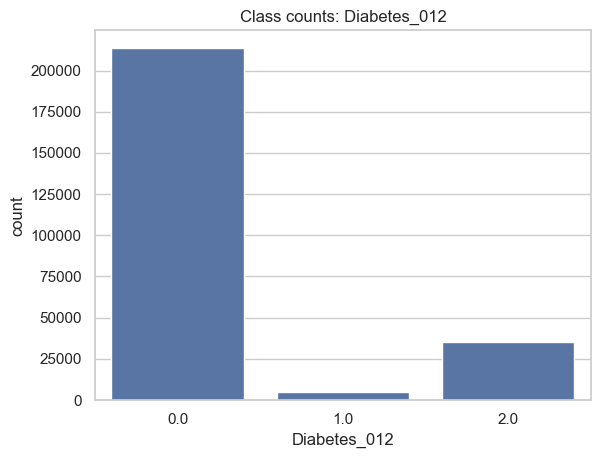

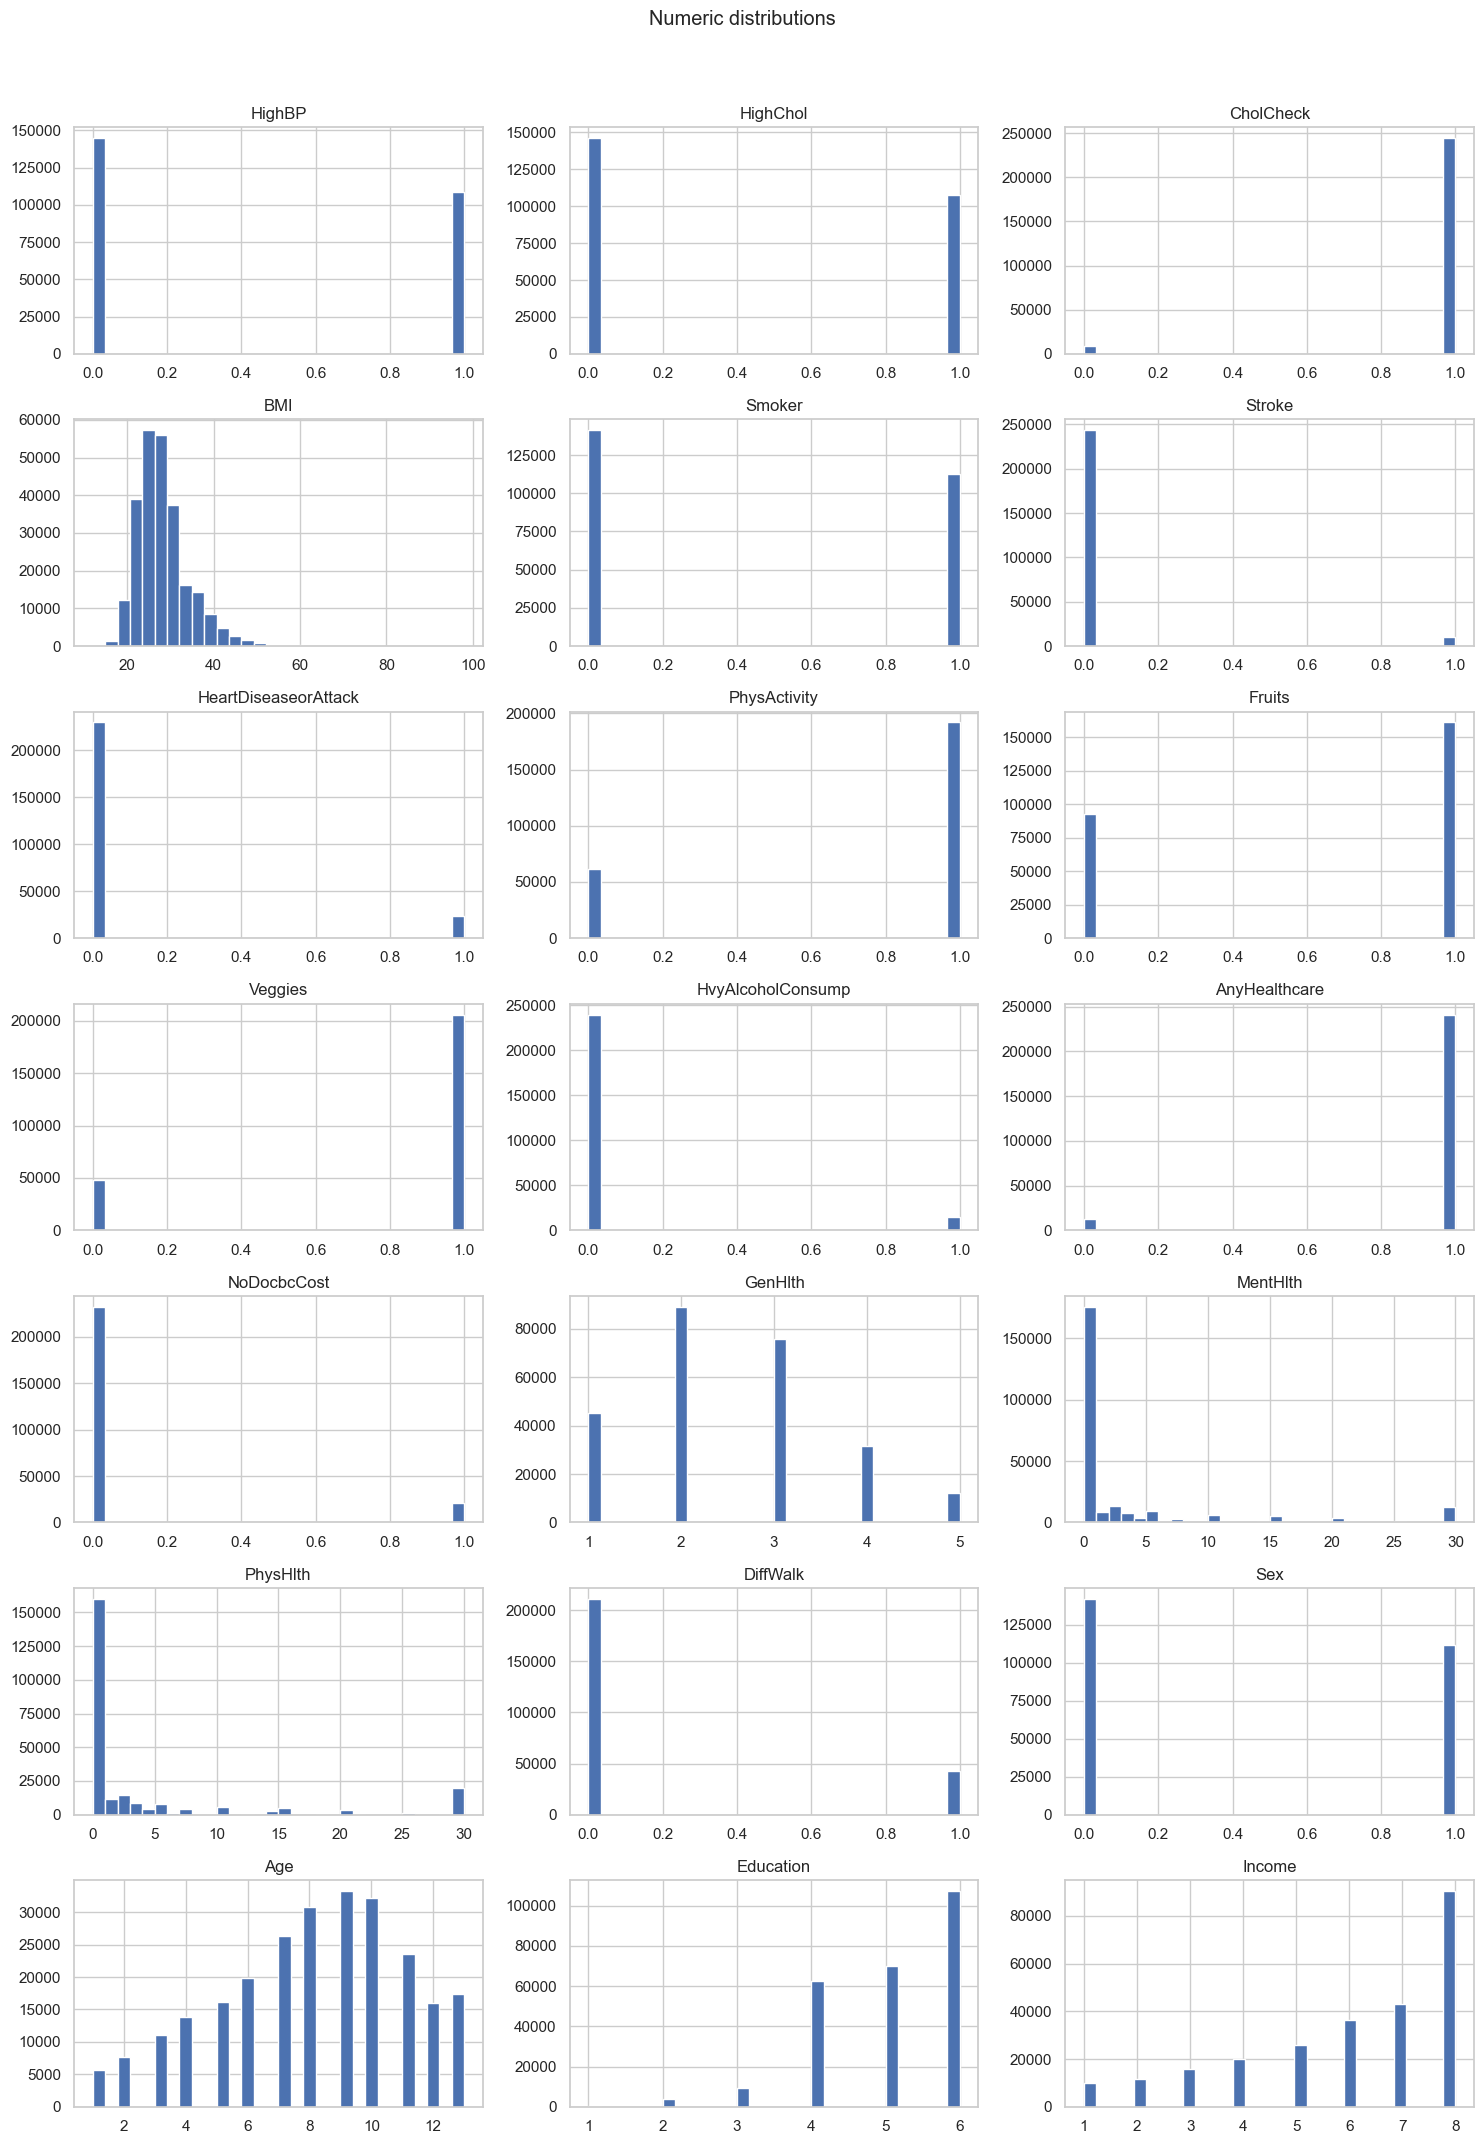

In [4]:
# Diabetes: class balance and distributions
DIABETES_TARGET = "Diabetes_012"
if DIABETES_TARGET in diabetes_df.columns:
    class_balance(diabetes_df, DIABETES_TARGET)
else:
    print(f"Warning: '{DIABETES_TARGET}' not found. Available columns: {list(diabetes_df.columns)[:20]} ...")

plot_distributions(diabetes_df, target_col=DIABETES_TARGET)


## Heart Disease EDA (`heart.csv`)


In [5]:
# Load heart dataset
HEART_FILE = "heart.csv"
heart_df = load_csv(HEART_FILE)
report_basic_info(heart_df, "Heart")


=== Heart: shape (918, 12) ===


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Missing values per column:
No missing values detected.



Class balance for HeartDisease:


,count,proportion
HeartDisease,,
0,410,0.446623
1,508,0.553377


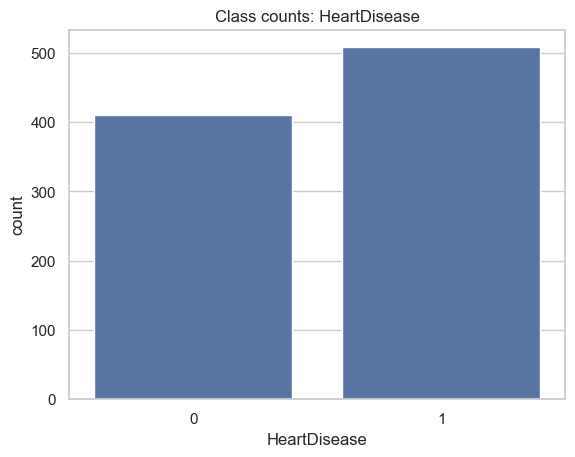

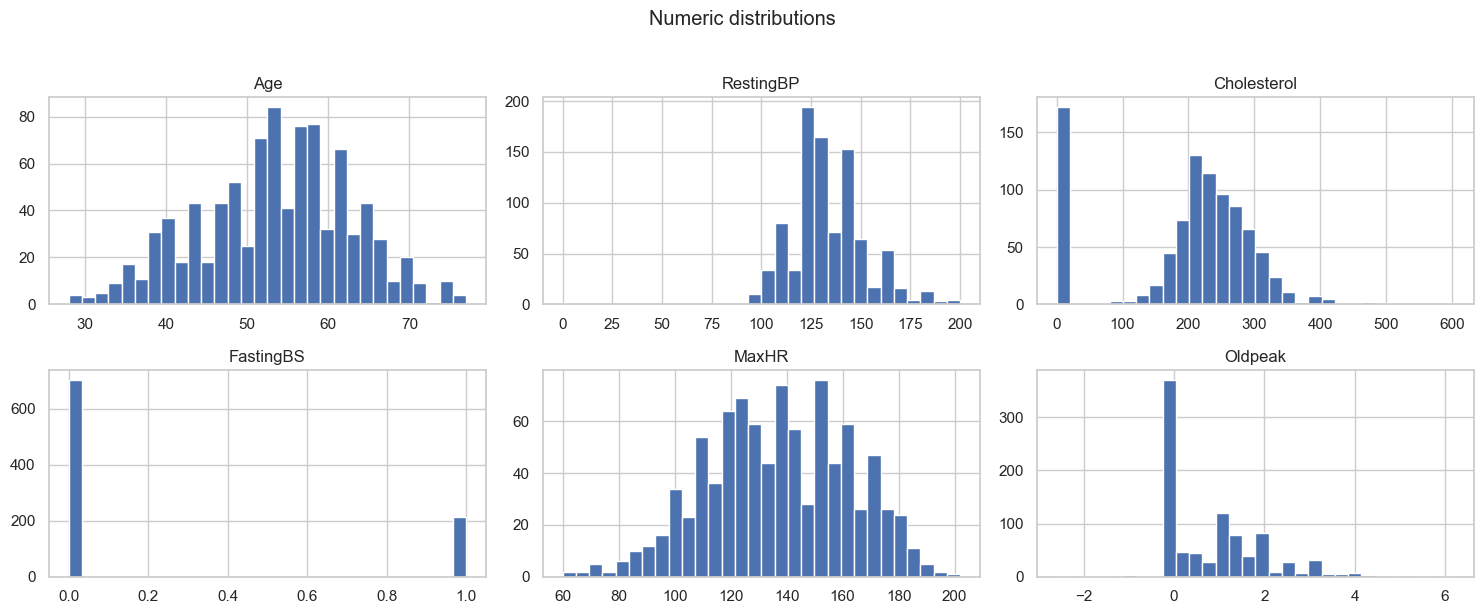

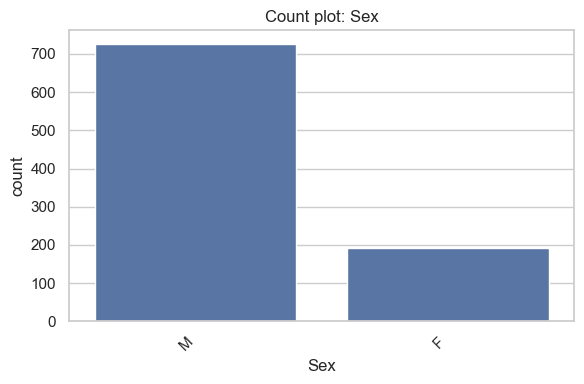

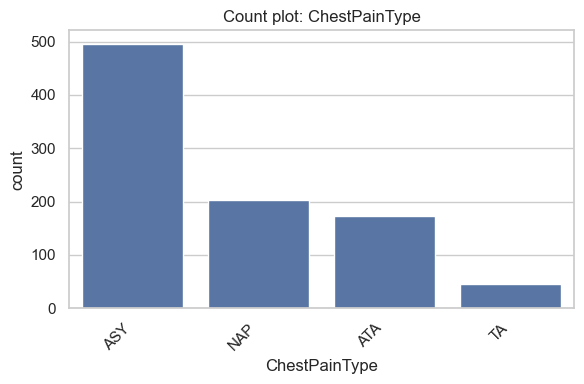

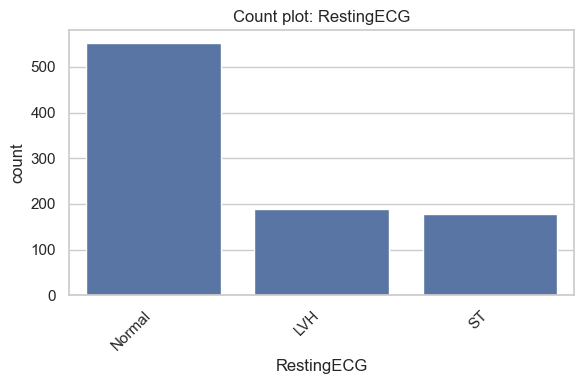

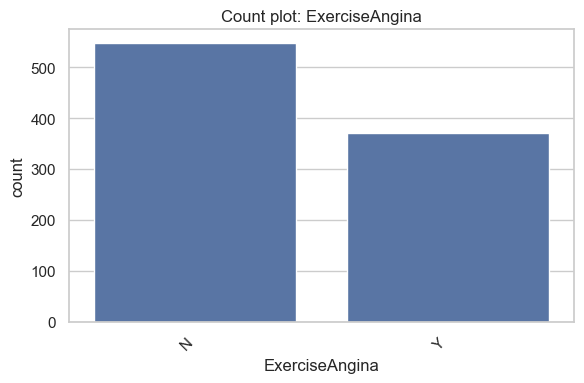

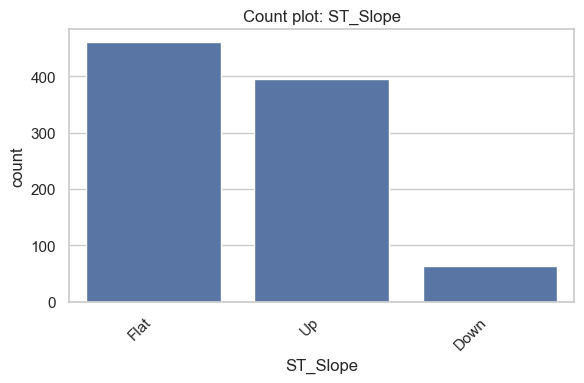

In [6]:
# Heart: class balance and distributions
HEART_TARGET_CANDIDATES = ["HeartDisease", "target", "Outcome"]
heart_target = next((c for c in HEART_TARGET_CANDIDATES if c in heart_df.columns), None)
if heart_target:
    class_balance(heart_df, heart_target)
else:
    print(f"Warning: none of {HEART_TARGET_CANDIDATES} found. Available columns: {list(heart_df.columns)[:20]} ...")

plot_distributions(heart_df, target_col=heart_target)


## Hypertension EDA (`hypertension_dataset.csv`)


In [7]:
# Load hypertension dataset
HYP_FILE = "hypertension_dataset.csv"
hyp_df = load_csv(HYP_FILE)
report_basic_info(hyp_df, "Hypertension")


=== Hypertension: shape (174982, 23) ===


,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,5.0,52,108,74,226,157,Female,Primary,Employed,High



.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174982 entries, 0 to 174981
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  174982 non-null  object 
 1   Age                      174982 non-null  int64  
 2   BMI                      174982 non-null  float64
 3   Cholesterol              174982 non-null  int64  
 4   Systolic_BP              174982 non-null  int64  
 5   Diastolic_BP             174982 non-null  int64  
 6   Smoking_Status           174982 non-null  object 
 7   Alcohol_Intake           174982 non-null  float64
 8   Physical_Activity_Level  174982 non-null  object 
 9   Family_History           174982 non-null  object 
 10  Diabetes                 174982 non-null  object 
 11  Stress_Level             174982 non-null  int64  
 12  Salt_Intake              174982 non-null  float64
 13  Sleep_Duration           174982 non-null  float64


Class balance for Hypertension:


,count,proportion
Hypertension,,
High,125781,0.718823
Low,49201,0.281177


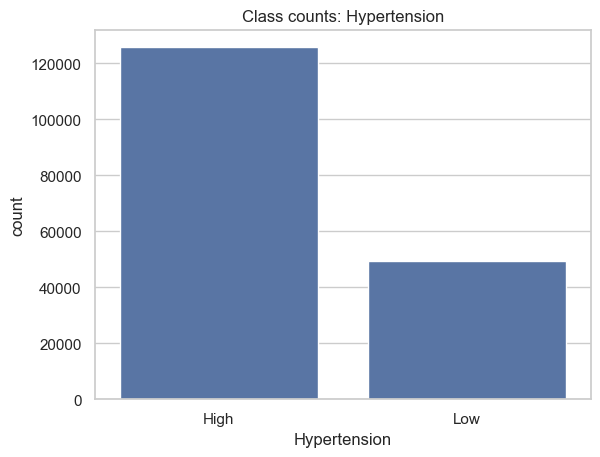

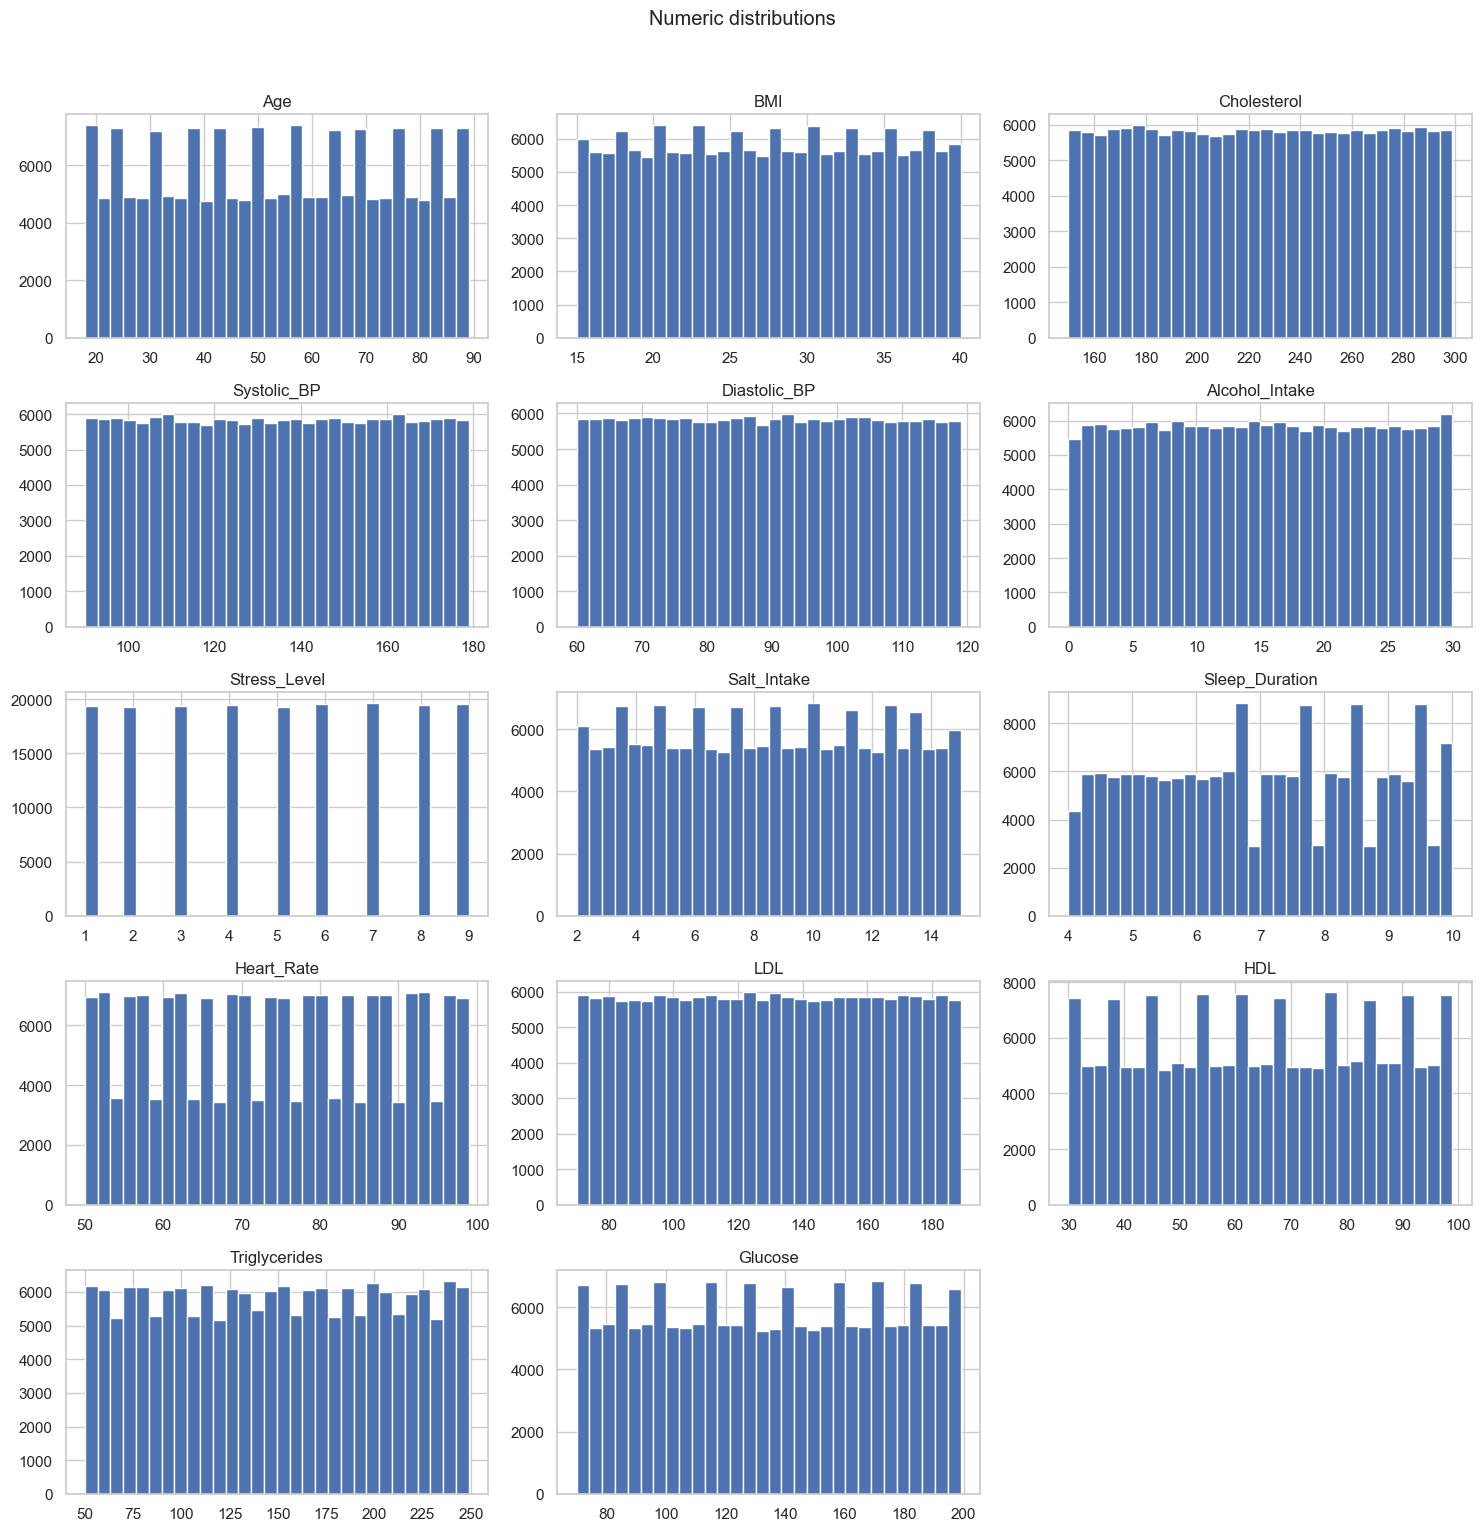

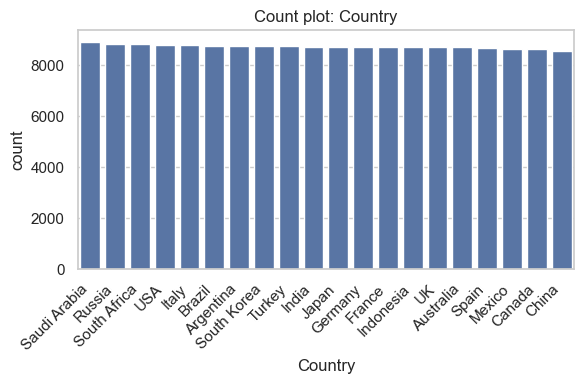

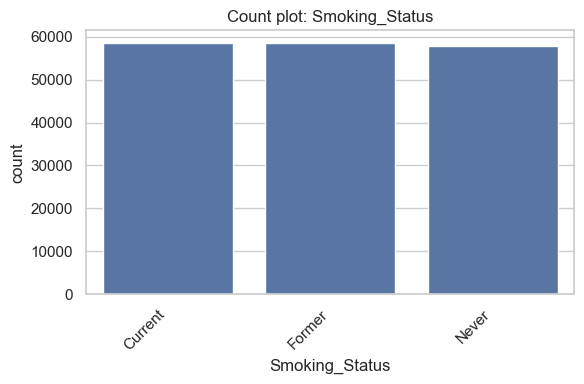

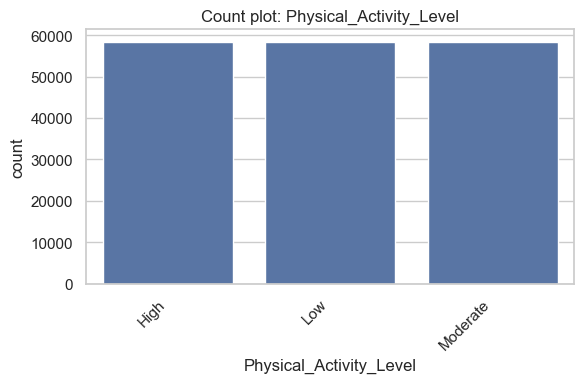

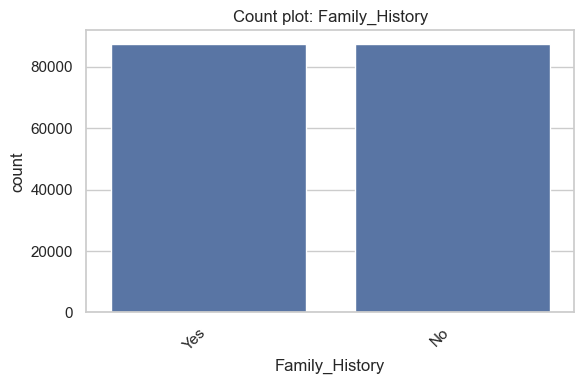

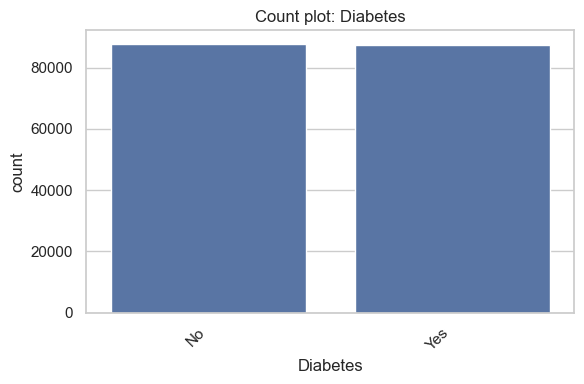

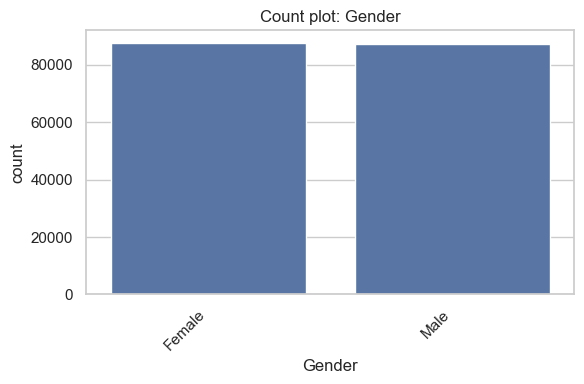

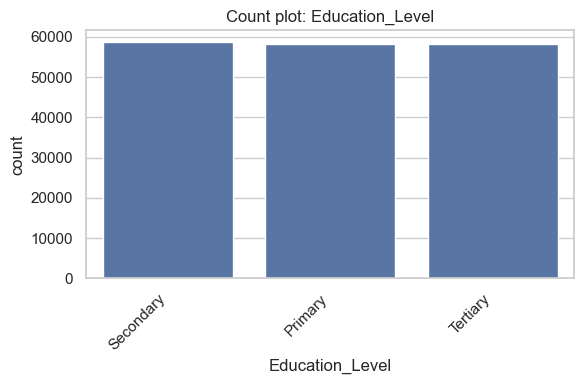

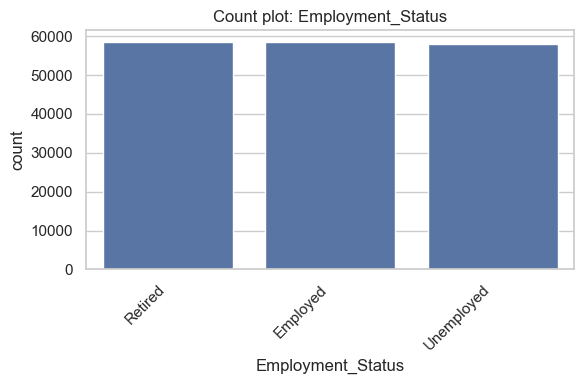

In [ ]:
# Hypertension: class balance and distributions
HYP_TARGET_CANDIDATES = ["Hypertension", "target", "Outcome", "hypertension"]
hyp_target = next((c for c in HYP_TARGET_CANDIDATES if c in hyp_df.columns), None)
if hyp_target:
    class_balance(hyp_df, hyp_target)
else:
    print(f"Warning: none of {HYP_TARGET_CANDIDATES} found. Available columns: {list(hyp_df.columns)[:20]} ...")

plot_distributions(hyp_df, target_col=hyp_target)
